In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv(
    "reports_iss_vaccini.csv",
    parse_dates=[
        "data", "pubblicazione", "popolazione_giorno",
        "diagnosi_start", "diagnosi_end",
        "ricoveri_start", "ricoveri_end",
        "intensive_start", "intensive_end",
        "decessi_start", "decessi_end"
    ]
)

In [3]:
df

,data,pubblicazione,url,fascia,vaccino,popolazione,diagnosi,ricoveri,intensive,decessi,...,intensive_start,intensive_end,decessi_start,decessi_end,totale,percentuale_popolazione,percentuale_diagnosi,percentuale_ricoveri,percentuale_intensive,percentuale_decessi
0,2021-07-14,2021-07-16,https://www.epicentro.iss.it/coronavirus/bolle...,12-39,non vaccinati,14011891,13549,513,13,7,...,2021-06-04,2021-07-04,2021-05-21,2021-06-20,17435555,0.803639,0.000967,0.000037,9.277834e-07,4.995757e-07
1,2021-07-14,2021-07-16,https://www.epicentro.iss.it/coronavirus/bolle...,12-39,vaccinati incompleto,1815895,1243,11,0,1,...,2021-06-04,2021-07-04,2021-05-21,2021-06-20,17435555,0.104149,0.000685,0.000006,0.000000e+00,5.506926e-07
2,2021-07-14,2021-07-16,https://www.epicentro.iss.it/coronavirus/bolle...,12-39,vaccinati completo,1607769,528,4,0,0,...,2021-06-04,2021-07-04,2021-05-21,2021-06-20,17435555,0.092212,0.000328,0.000002,0.000000e+00,0.000000e+00
3,2021-07-14,2021-07-16,https://www.epicentro.iss.it/coronavirus/bolle...,40-59,non vaccinati,9340510,5747,779,66,45,...,2021-06-04,2021-07-04,2021-05-21,2021-06-20,18447460,0.506330,0.000615,0.000083,7.065995e-06,4.817724e-06
4,2021-07-14,2021-07-16,https://www.epicentro.iss.it/coronavirus/bolle...,40-59,vaccinati incompleto,5502988,1586,51,3,4,...,2021-06-04,2021-07-04,2021-05-21,2021-06-20,18447460,0.298306,0.000288,0.000009,5.451584e-07,7.268778e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-11-10,2021-11-12,https://www.epicentro.iss.it/coronavirus/bolle...,80+,non vaccinati,232553,1223,439,26,162,...,2021-10-01,2021-10-31,2021-09-17,2021-10-17,4564103,0.050953,0.005259,0.001888,1.118025e-04,6.966154e-04
220,2021-11-10,2021-11-12,https://www.epicentro.iss.it/coronavirus/bolle...,80+,vaccinati incompleto,94295,118,35,0,13,...,2021-10-01,2021-10-31,2021-09-17,2021-10-17,4564103,0.020660,0.001251,0.000371,0.000000e+00,1.378652e-04
221,2021-11-10,2021-11-12,https://www.epicentro.iss.it/coronavirus/bolle...,80+,vaccinati completo <= 6 mesi,2317784,2621,664,40,214,...,2021-10-01,2021-10-31,2021-09-17,2021-10-17,4564103,0.507829,0.001131,0.000286,1.725786e-05,9.232957e-05
222,2021-11-10,2021-11-12,https://www.epicentro.iss.it/coronavirus/bolle...,80+,vaccinati completo > 6 mesi,1776980,2747,487,21,76,...,2021-10-01,2021-10-31,2021-09-17,2021-10-17,4564103,0.389338,0.001546,0.000274,1.181780e-05,4.276919e-05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   data                     224 non-null    datetime64[ns]
 1   pubblicazione            224 non-null    datetime64[ns]
 2   url                      224 non-null    object        
 3   fascia                   224 non-null    object        
 4   vaccino                  224 non-null    object        
 5   popolazione              224 non-null    int64         
 6   diagnosi                 224 non-null    int64         
 7   ricoveri                 224 non-null    int64         
 8   intensive                224 non-null    int64         
 9   decessi                  224 non-null    int64         
 10  popolazione_giorno       224 non-null    datetime64[ns]
 11  diagnosi_start           224 non-null    datetime64[ns]
 12  diagnosi_end             224 non-nul

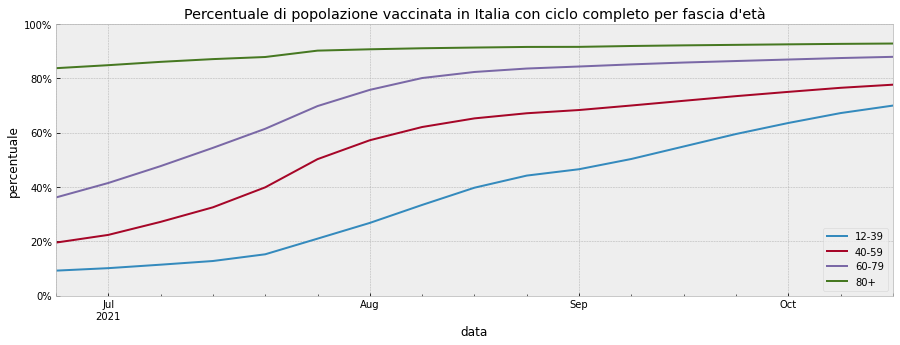

In [5]:
with plt.style.context("bmh"):
    fig, ax = plt.subplots(figsize=(15, 5))
    for fascia in df.fascia.unique():
        _df = df[(df.fascia==fascia)&(df.vaccino=="vaccinati completo")]
        _df.plot(x='popolazione_giorno', y='percentuale_popolazione', label=fascia, ax=ax)
    ax.set(
        ylim=(0, 1),
        xlabel="data",
        ylabel="percentuale",
        title="Percentuale di popolazione vaccinata in Italia con ciclo completo per fascia d'età"
    )
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
    plt.show()

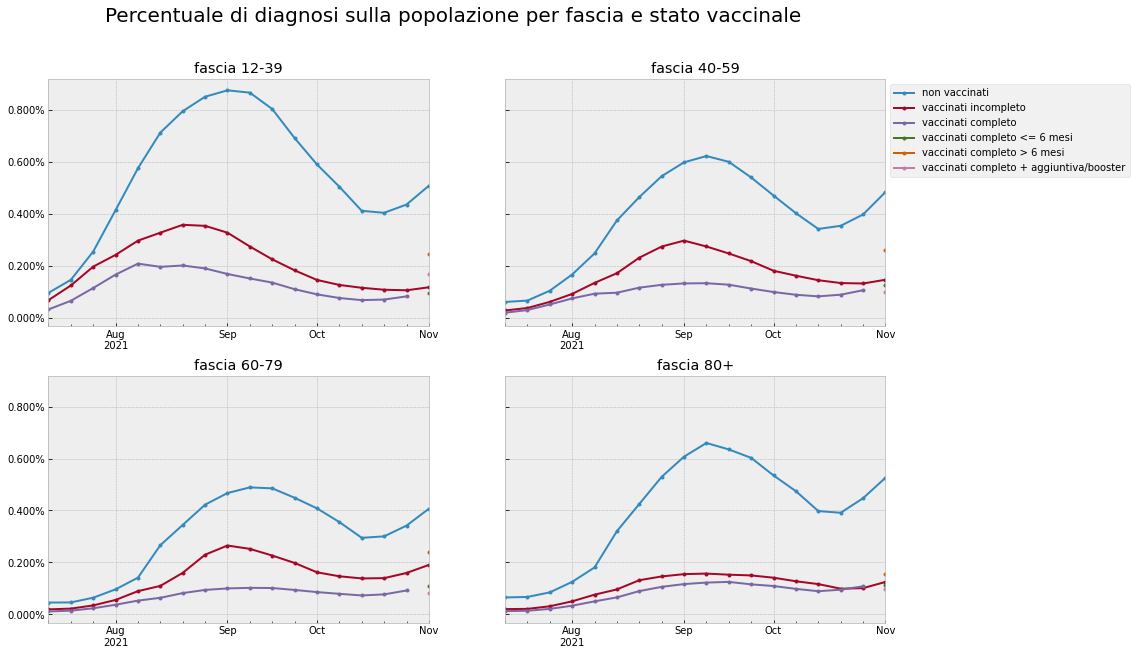

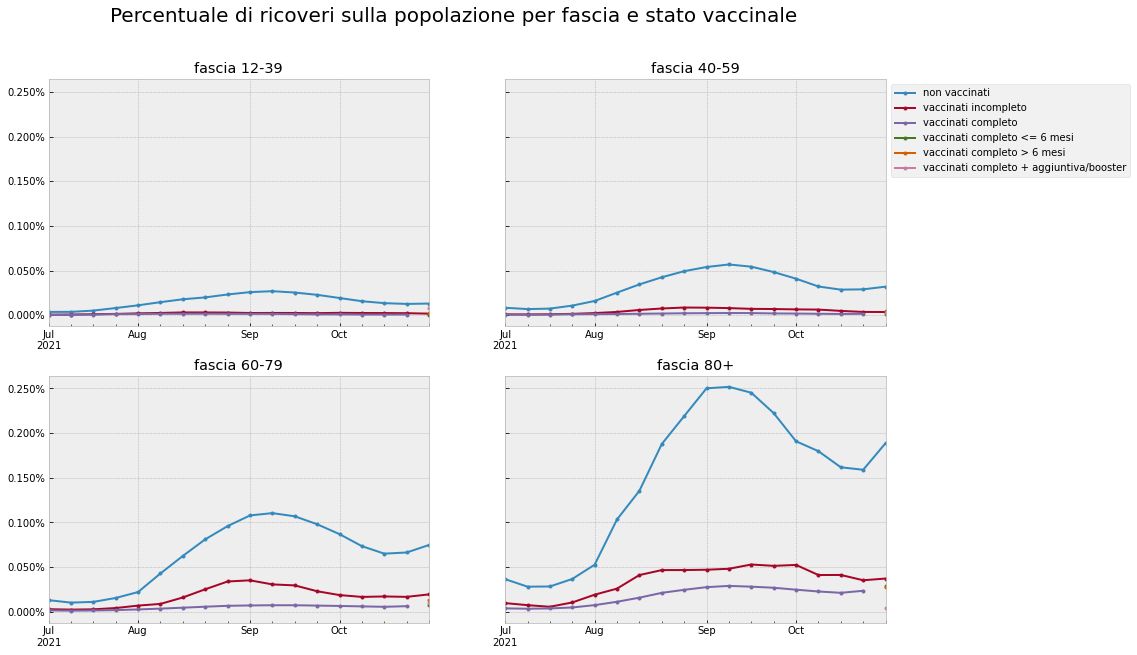

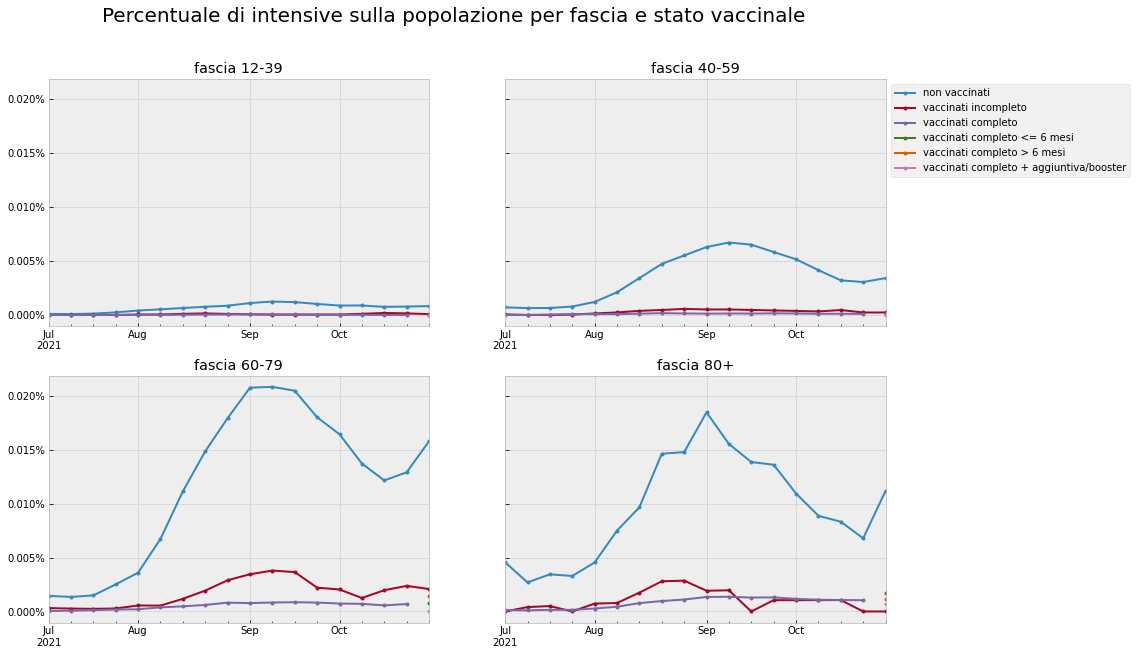

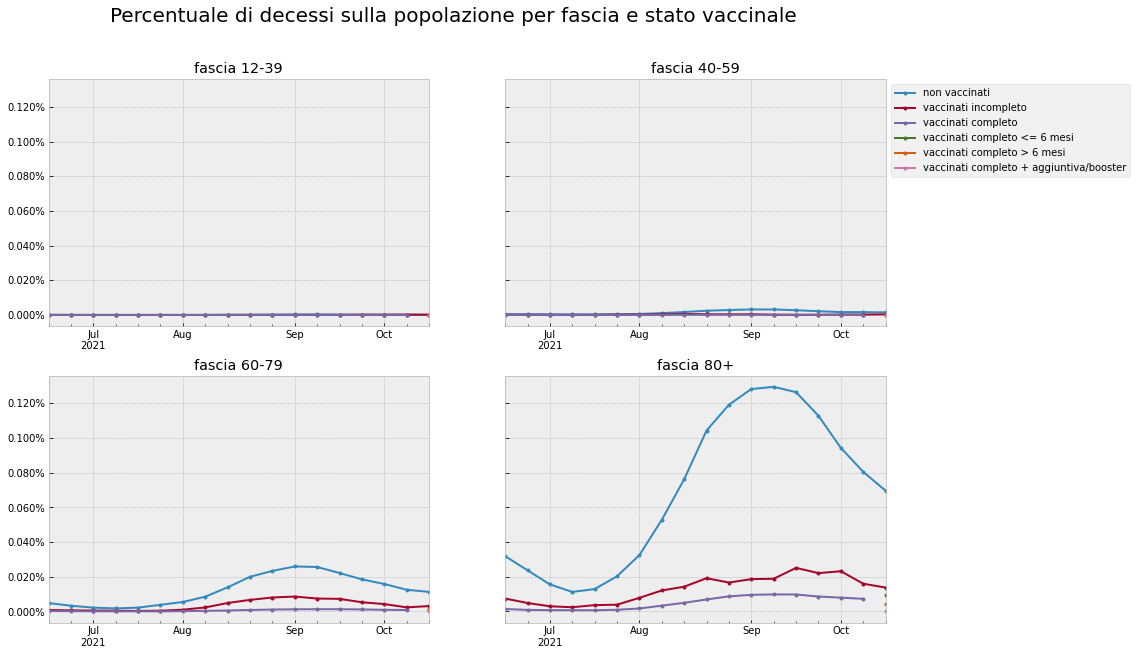

In [6]:
with plt.style.context("bmh"):
    for y in ["diagnosi", "ricoveri", "intensive", "decessi"]:
        fig, ax = plt.subplots(2, 2, figsize=(15, 10), facecolor="w", sharey=True)
        for i, fascia in enumerate(df.fascia.unique()):
            for v in df.vaccino.unique():
                df[(df.fascia==fascia)&(df.vaccino==v)].plot(
                    x=f"{y}_end", y=f"percentuale_{y}", marker='.', ax=ax.flat[i], label=v)
            ax.flat[i].set(title=f"fascia {fascia}", xlabel="")
            ax.flat[i].yaxis.set_major_formatter(mtick.PercentFormatter(1, 3))
            if i == 1:
                ax.flat[i].legend(loc="upper left", bbox_to_anchor=(1, 1))
            else:
                ax.flat[i].get_legend().remove()
        fig.suptitle(f"Percentuale di {y} sulla popolazione per fascia e stato vaccinale", fontsize=20,)
        plt.show()

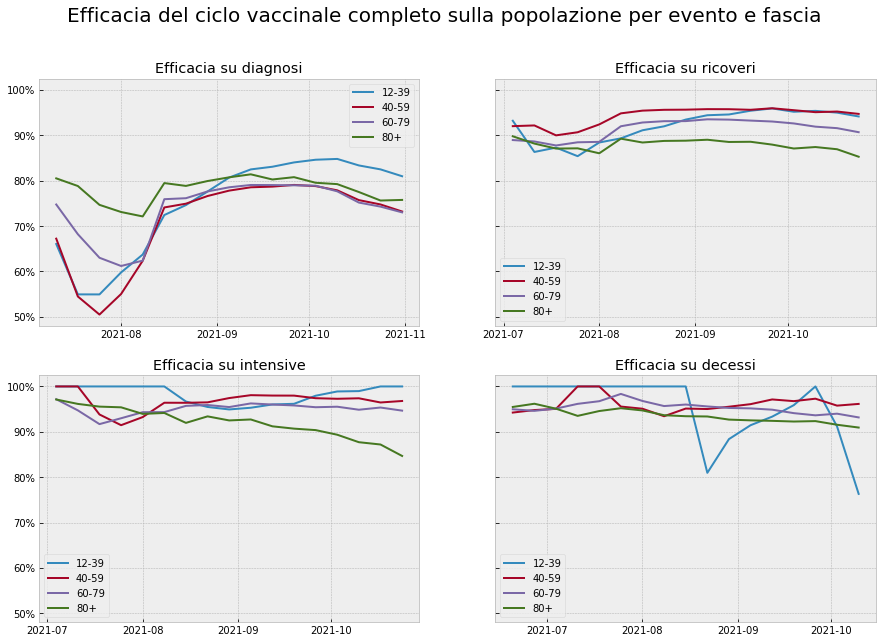

In [7]:
with plt.style.context("bmh"):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10), facecolor="w", sharey=True)
    for i, y in enumerate(["diagnosi", "ricoveri", "intensive", "decessi"]):
        for fascia in df.fascia.unique():
            E_c = 1 - (
                df[
                    (df.fascia==fascia)&(df.vaccino=="vaccinati completo")][f"percentuale_{y}"].values
                /
                df[
                    (df.fascia==fascia)
                    &
                    (df.vaccino=="non vaccinati")
                    &(df.data<"2021-11-08")][f"percentuale_{y}"].values
            )
            ax.flat[i].plot(df[(df.data<"2021-11-08")][f"{y}_end"].unique(), E_c, label=fascia)
            ax.flat[i].set(title=f"Efficacia su {y}", xlabel="")
            ax.flat[i].yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
            ax.flat[i].xaxis.set_major_locator(mdates.MonthLocator())
            ax.flat[i].legend()
    fig.suptitle(f"Efficacia del ciclo vaccinale completo sulla popolazione per evento e fascia", fontsize=20,)
    plt.show()

In [8]:
eventi = df.columns[6:10]
eventi

Index(['diagnosi', 'ricoveri', 'intensive', 'decessi'], dtype='object')

In [9]:
fasce = df.fascia.unique()
fasce

array(['12-39', '40-59', '60-79', '80+'], dtype=object)

In [10]:
data_differenziazione = df[df.vaccino=="vaccinati completo <= 6 mesi"].data.min()
data_differenziazione

Timestamp('2021-11-10 00:00:00')

In [11]:
vaccini = df[(df.data>=data_differenziazione)&(df.vaccino!="non vaccinati")].vaccino.unique()
vaccini

array(['vaccinati incompleto', 'vaccinati completo <= 6 mesi',
       'vaccinati completo > 6 mesi',
       'vaccinati completo + aggiuntiva/booster'], dtype=object)

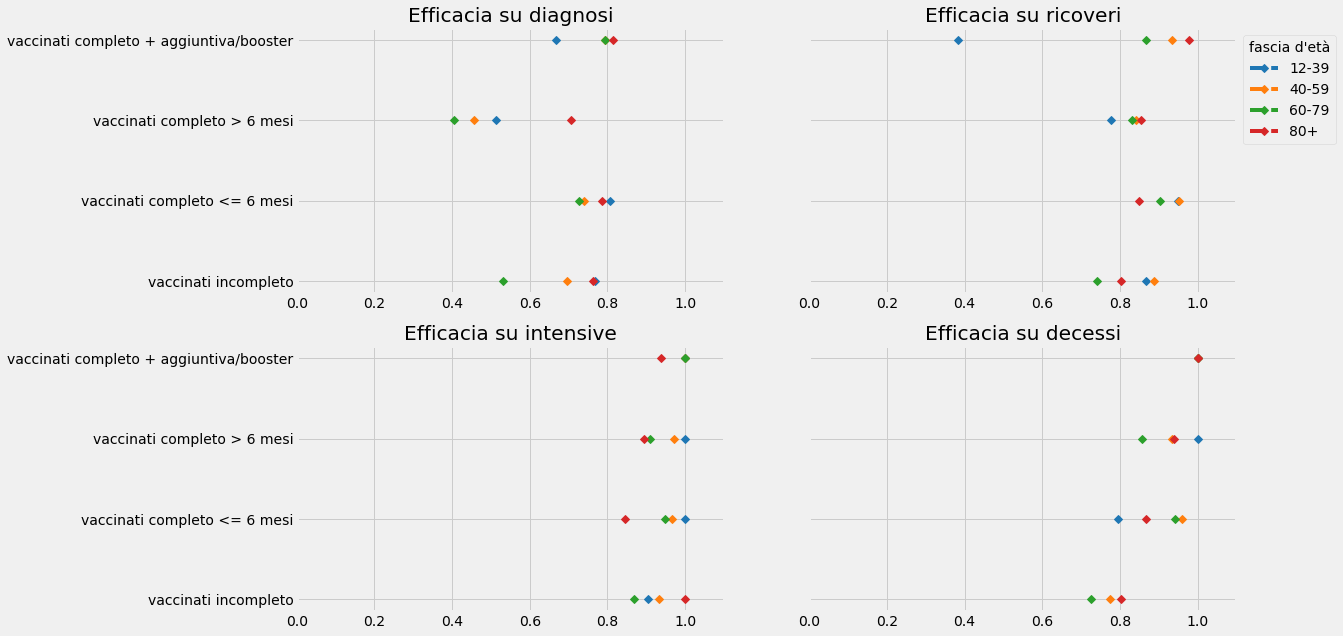

In [12]:
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
    for f, fascia in enumerate(fasce):
        for e, evento in enumerate(eventi):
            for v, vaccino in enumerate(vaccini):
                EE = df[
                    (df.fascia==fascia)&(df.vaccino==vaccino)
                    &(df.data>=data_differenziazione)
                ][evento].values
                EN = df[
                    (df.fascia==fascia)&(df.vaccino==vaccino)
                    &(df.data>=data_differenziazione)
                ].popolazione.values
                if not EN: continue

                CE = df[
                    (df.fascia==fascia)&(df.vaccino=="non vaccinati")
                    &(df.data>=data_differenziazione)
                ][evento].values
                CN = df[
                    (df.fascia==fascia)&(df.vaccino=="non vaccinati")
                    &(df.data>=data_differenziazione)
                ].popolazione.values
                if not CN: continue

                EER = EE / EN
                CER = CE / CN
                if not CER: continue

                E = 1 - EER / CER
                ax.flat[e].plot(E, vaccino, 'D--', color=f"C{f}", label=fascia if not v else "")
                ax.flat[e].set(
                    xlim=(0,1.1),
                    title=f"Efficacia su {evento}"
                )
                if e==1:
                    ax.flat[e].legend(loc="upper left", bbox_to_anchor=(1,1), title="fascia d'età")